In [16]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

In [17]:
multiclass_df = pd.read_csv('./multi_class_evaluation_results.csv')

In [18]:
multiclass_df.head()

,Unnamed: 0,model,name,aurc,f1_micro,f1_none,precision,recall,recall_none,acc,dataset,risk_list,coverage_list,label_distribution
0,0,anon/deberta-v3-large-finetuned-synth...,multiclass,0.000095,0.996074,[0.97402597 0.96911197 0.99864682 0.962818 ],[0.98253275 0.98818898 0.99769678 0.96470588],0.996074,[0.96566524 0.95075758 0.99959868 0.9609375 ],0.996074,all,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.129918743723181e-05, 0.00018259837487446363...","[('LABEL_2', 1), ('LABEL_2', 1), ('LABEL_0', 1..."
1,1,anon/deberta-v3-large-finetuned-synth...,multiclass,0.097692,0.998083,[0.98146129 0. 0.99929789 0. ],[0.99778271 0. 0.99899729 0. ],0.998083,[0.96566524 0. 0.99959868 0. ],0.998083,generate,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.584970765839164e-05, 0.00019169941531678328...","[('LABEL_2', 1), ('LABEL_2', 1), ('LABEL_0', 1..."
2,2,anon/deberta-v3-large-finetuned-synth...,multiclass,0.088091,0.998338,[0. 0.97286822 0.99934801 0. ],[0. 0.99603175 0.99909747 0. ],0.998338,[0. 0.95075758 0.99959868 0. ],0.998338,paraphrase,"[0.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16...","[9.77421561919656e-05, 0.0001954843123839312, ...","[('LABEL_2', 1), ('LABEL_2', 1), ('LABEL_2', 0..."
3,3,anon/deberta-v3-large-finetuned-synth...,multiclass,0.092868,0.998631,[0. 0. 0.99959868 0.97619048],[0. 0. 0.99959868 0.99193548],0.998631,[0. 0. 0.99959868 0.9609375 ],0.998631,translate,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.781864423359092e-05, 0.00019563728846718183...","[('LABEL_2', 1), ('LABEL_2', 1), ('LABEL_2', 0..."


In [19]:
tool_labels = {
    "generate": 0,
    "paraphrase": 1,
    "real": 2,
    "translate": 3 
}
test_df = pd.read_csv("../data/real_and_fake_passages_dataset_test.csv")
test_df['pred'] = test_df["tool"].apply(lambda x: tool_labels[x]) # translated and real labels

In [20]:
results = []

In [21]:
label_map = {
    'LABEL_0': 0,
    'LABEL_1': 1,
    'LABEL_2': 2,
    'LABEL_3': 3
}
y_pred = [label_map[item[0]] for item in eval(multiclass_df[multiclass_df['dataset'] == 'all']['label_distribution'][0]) ]
y_true = list(test_df['pred'])
cm = confusion_matrix(y_true, y_pred)

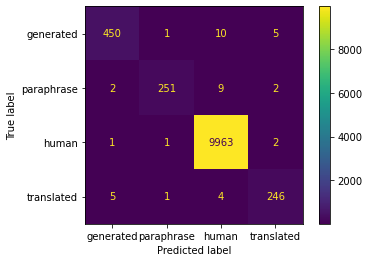

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["generated",
    "paraphrase",
    "human",
    "translated" ]
)
disp.plot()

In [8]:
print("Multiclass Score")
test_df['y_pred_multiclass'] = y_pred
generate_df = test_df[test_df['tool'] == 'generate']
for model in test_df[test_df['tool'] == 'generate'].model.unique():
    df = generate_df[generate_df['model'] == model]
    score = f1_score(df['y_pred_multiclass'], df['pred'], average='micro')
    results.append({
        "model": model,
        "score": score,
        "multiclass_model": "multiclass"
    })

Multiclass Score


In [9]:
ablation_df = pd.read_csv('./multi_class_ablation_evaluation_results.csv')

In [10]:
ablation_df.head()

,Unnamed: 0,model,name,aurc,f1_micro,f1_none,precision,recall,recall_none,acc,risk_list,coverage_list,label_distribution
0,0,anon/deberta-v3-large-finetuned-synda...,multiclass-leave-out-bloom,0.000604,0.988588,[0.8813161 0.9631068 0.997147 0.86987522],[0.97402597 0.98804781 0.99490611 0.8 ],0.988588,[0.80472103 0.93939394 0.99939801 0.953125 ],0.988588,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.129918743723181e-05, 0.00018259837487446363...","[('LABEL_2', 1), ('LABEL_2', 1), ('LABEL_0', 1..."
1,1,anon/deberta-v3-large-finetuned-synda...,multiclass-leave-out-gpt2,0.000152,0.993974,[0.95931478 0.94695481 0.99804541 0.94509804],[0.95726496 0.98367347 0.99709593 0.9488189 ],0.993974,[0.96137339 0.91287879 0.99899669 0.94140625],0.993974,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.129918743723181e-05, 0.00018259837487446363...","[('LABEL_2', 1), ('LABEL_2', 1), ('LABEL_0', 1..."


In [11]:
label_map = {
    'LABEL_0': 0,
    'LABEL_1': 1,
    'LABEL_2': 2,
    'LABEL_3': 3
}
y_pred = [label_map[item[0]] for item in eval(ablation_df[ablation_df['name'] == 'multiclass-leave-out-bloom']['label_distribution'][0]) ]
y_true = list(test_df['pred'])

In [12]:
print("Multiclass (leave out bloom) Score")
test_df['y_pred_multiclass'] = y_pred
generate_df = test_df[test_df['tool'] == 'generate']
for model in test_df[test_df['tool'] == 'generate'].model.unique():
    df = generate_df[generate_df['model'] == model]
    score = f1_score(df['y_pred_multiclass'], df['pred'], average='micro')
    results.append({
        "model": model,
        "score": score,
        "multiclass_model": "multiclass_leave_out_bloom",
    })

Multiclass (leave out bloom) Score


In [13]:
label_map = {
    'LABEL_0': 0,
    'LABEL_1': 1,
    'LABEL_2': 2,
    'LABEL_3': 3
}
y_pred = [label_map[item[0]] for item in eval(ablation_df[ablation_df['name'] == 'multiclass-leave-out-gpt2']['label_distribution'][1]) ]
y_true = list(test_df['pred'])

In [14]:
print("Multiclass (leave out arxiv) Score")
test_df['y_pred_multiclass'] = y_pred
generate_df = test_df[test_df['tool'] == 'generate']
for model in test_df[test_df['tool'] == 'generate'].model.unique():
    df = generate_df[generate_df['model'] == model]
    score = f1_score(df['y_pred_multiclass'], df['pred'], average='micro')
    results.append({
        "model": model,
        "score": score,
        "multiclass_model": "multiclass_leave_out_gpt2_arxiv"
    })

Multiclass (leave out arxiv) Score


In [15]:
pd.DataFrame(results).to_csv('multiclass_ablation.csv')